In [20]:
from sklearn.datasets import load_iris
iris = load_iris()

In [22]:
import pandas as pd
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

In [24]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [75]:
import matplotlib.pyplot as plt

Используя Matplotlib отрисовать в цвете для всех 3 сортов зависимости: 'sepal length  - sepal width’ и 'petal length  - petal width'

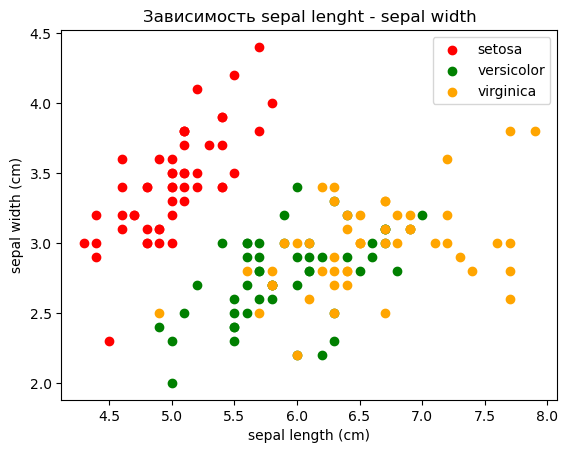

In [82]:
plt.scatter(df[df['target'] == 0]['sepal length (cm)'], df[df['target'] == 0]['sepal width (cm)'], color='red', label='setosa')
plt.scatter(df[df['target'] == 1]['sepal length (cm)'], df[df['target'] == 1]['sepal width (cm)'], color='green', label='versicolor')
plt.scatter(df[df['target'] == 2]['sepal length (cm)'], df[df['target'] == 2]['sepal width (cm)'], color='orange', label='virginica')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Зависимость sepal lenght - sepal width")
plt.legend()
plt.show()

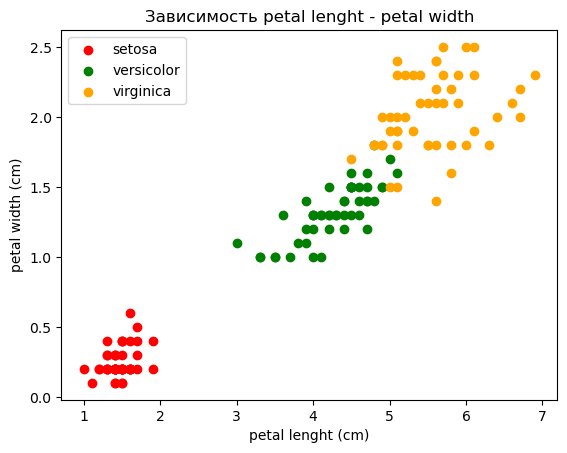

In [88]:
plt.scatter(df[df['target']== 0]['petal length (cm)'], df[df['target'] == 0]['petal width (cm)'], color = 'red', label = 'setosa')
plt.scatter(df[df['target'] == 1]['petal length (cm)'], df[df['target'] == 1]['petal width (cm)'], color = 'green', label = 'versicolor')
plt.scatter(df[df['target'] == 2]['petal length (cm)'], df[df['target'] == 2]['petal width (cm)'], color = 'orange', label = 'virginica')
plt.title("Зависимость petal lenght - petal width")
plt.ylabel("petal width (cm)")
plt.xlabel("petal lenght (cm)")
plt.legend()

In [90]:
import seaborn 

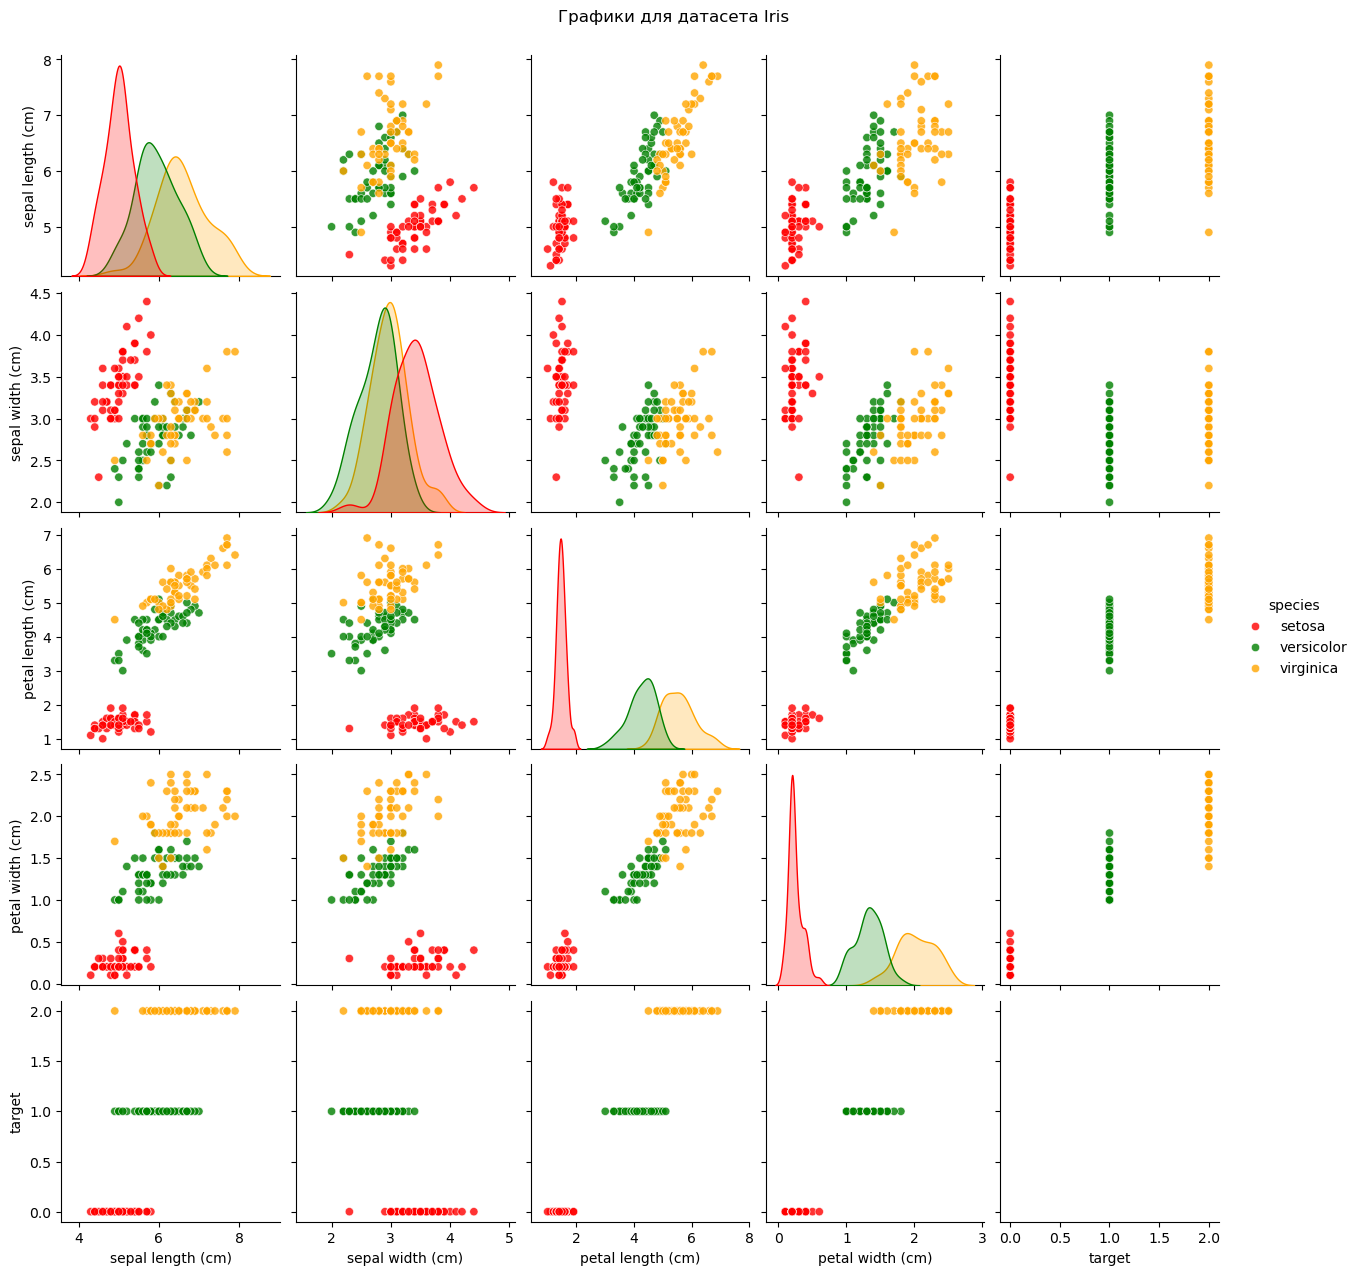

In [116]:
import seaborn

# Создаю копию, чтобы добавить доп столбец в датасете
df_plot = df.copy()
df_plot['species'] = df_plot['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

seaborn.pairplot(df_plot, hue='species', palette={'setosa': 'red', 'versicolor': 'green', 'virginica': 'orange'}, plot_kws={'alpha': 0.8})
plt.suptitle('Графики для датасета Iris', y=1.02)
plt.show()

Подготовим из имеющегося набора данных 2 датасета: в первом оставить setosa и versicolor, во втором – versicolor и  virginica 

In [128]:
df1 = df[df['target'].isin([0,1])] #setosa и versicolor
df2 = df[df['target'].isin([1,2])] #versicolor и virginica

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X1 = df1[iris.feature_names] 
y1 = df1['target']    
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

X2 = df2[iris.feature_names] 
y2 = df2['target']    
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [170]:
clf1 = LogisticRegression(random_state=0)
clf1.fit(X1_train, y1_train)
y1_pred = clf1.predict(X1_test)
accuracy1 = accuracy_score(y1_test, y1_pred)
print(f"Точность (setosa + versicolor): {accuracy1:.2f}")

Точность (setosa + versicolor): 1.00


In [168]:
clf2 = LogisticRegression(random_state=0)
clf2.fit(X2_train, y2_train)
y2_pred = clf2.predict(X2_test)
accuracy2 = accuracy_score(y2_test, y2_pred)
print(f"Точность (versicolor + virginica): {accuracy2:.2f}")

Точность (versicolor + virginica): 0.94


In [176]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на синтетических данных: {accuracy:.2f}")

Точность на синтетических данных: 0.94


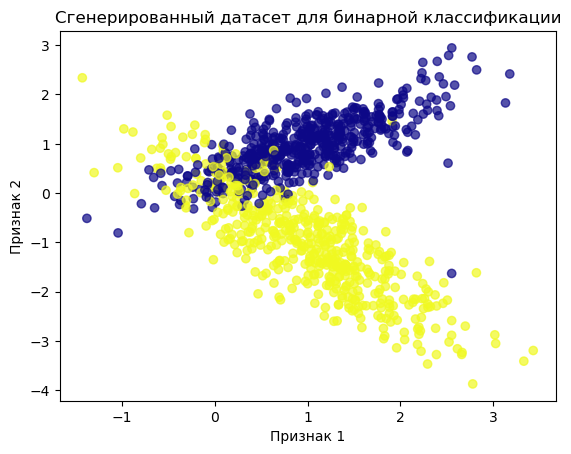

In [221]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma', alpha=0.7)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Сгенерированный датасет для бинарной классификации')
plt.show()